# About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

# Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

# Dataset

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:
Dataset link: Walmart_data.csv

User_ID:	User ID

Product_ID:	Product ID

Gender:	Sex of User

Age:	Age in bins

Occupation:	Occupation(Masked)

City_Category:	Category of the City (A,B,C)

StayInCurrentCityYears:	Number of years stay in current city

Marital_Status:	Marital Status

ProductCategory:	Product Category (Masked)

Purchase:	Purchase Amount

## Import all required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

## Loading The Dataset

In [ ]:
data=pd.read_csv('/walmart.csv')

## Basic Data Analysis

In [ ]:
data.shape

(550068, 10)

The dataset has 550068 rows and 10 columns

In [ ]:
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
for i in data.columns:
  print("Unique values in ",i," column are:")
  print(data[i].unique())
  print("*"*75)

Unique values in  User_ID  column are:
[1000001 1000002 1000003 ... 1004113 1005391 1001529]
***************************************************************************
Unique values in  Product_ID  column are:
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
***************************************************************************
Unique values in  Gender  column are:
['F' 'M']
***************************************************************************
Unique values in  Age  column are:
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
***************************************************************************
Unique values in  Occupation  column are:
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
***************************************************************************
Unique values in  City_Category  column are:
['A' 'C' 'B']
***************************************************************************
Unique values in  Stay_In_

Obsevations

1. The data does not contain any abnormal values.
2. The age column is a category which denotes a range of ages.
3. City_Category contains values A,B,C.

5. Marital Status is either 0 or 1 (indicating 0 for single and 1 for married)

4. Stay_In_Current_City_Years is also a category as there is value of more than years.


In [ ]:
data.duplicated().any()

np.False_

No duplicates are found

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


There are 10 columns.
User_ID,Occupation,Marital_Status,Product_Category have datatype as int64.
Product_ID,Gender,Age,City_Categoy,Stay_In_Current_City_Years have datatype as object.
Purchase has datatype of float64.

No column contain any null value

## Statistical Summary

In [ ]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


Obervations:

1.Occupation is between 0 to 20 with a mean of 8.

2.Product Category is between 1 to 20 with a mean of 5.4

3.Purchase is between 185 to 23961 with a mean of 9326.

In [ ]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
data['Marital_Status'] = data['Marital_Status'].replace({0:'Unmarried',1:'Married'})

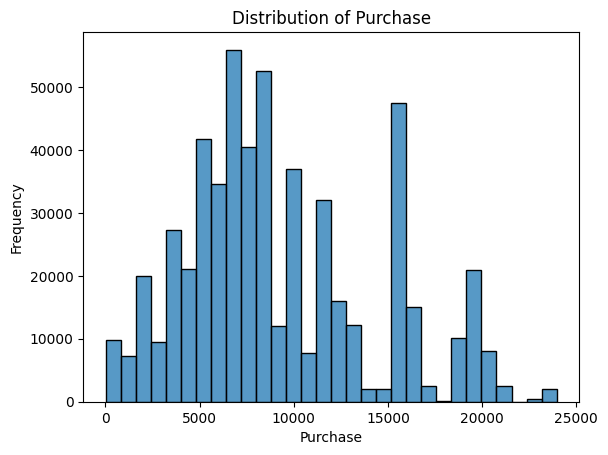

In [ ]:
sns.histplot(data['Purchase'],bins=30)
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase')
plt.show()

Observations:

1. The distribution of purchase amounts is right-skewed, indicating that most transactions are for smaller amounts, with fewer transactions for larger amounts.
2. The peak of the distribution is around the lower purchase values.
3. There is a long tail extending towards higher purchase amounts, suggesting the presence of some high-value transactions (outliers).

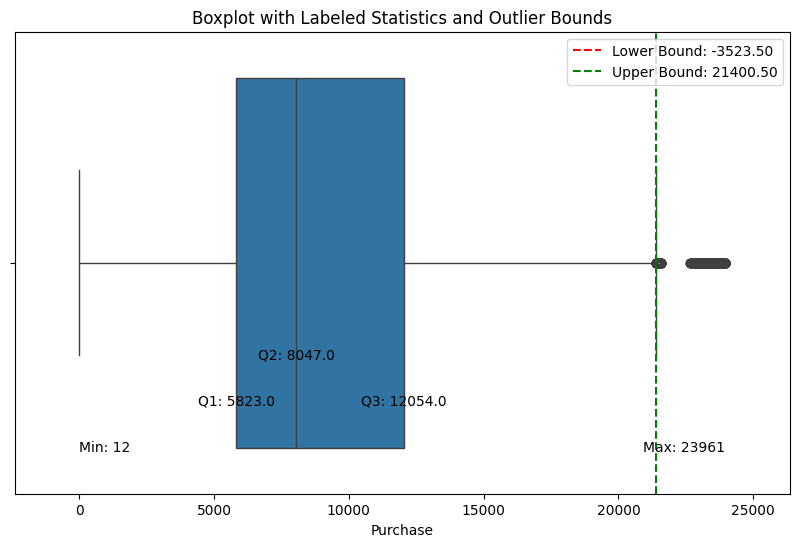

In [ ]:
d = data['Purchase']
min_val = np.min(d)
max_val = np.max(d)
q1 = np.percentile(d, 25)
q2 = np.median(d)
q3 = np.percentile(d, 75)


plt.figure(figsize=(10, 6))
sns.boxplot(x=d)

# Calculate Q1, Q3, and IQR
Q1 = d.quantile(0.25)
Q3 = d.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Add vertical lines for lower and upper bounds
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound: {lower_bound:.2f}')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')

padding = (max_val - min_val) * 0.1
plt.xlim(min_val - padding, max_val + padding)


plt.text(min_val, 0.4, f'Min: {min_val}', horizontalalignment='left', verticalalignment='center')
plt.text(max_val, 0.4, f'Max: {max_val}', horizontalalignment='right', verticalalignment='center')
plt.text(q1, 0.3, f'Q1: {q1}', horizontalalignment='center', verticalalignment='center')
plt.text(q2, 0.2, f'Q2: {q2}', horizontalalignment='center', verticalalignment='center')
plt.text(q3, 0.3, f'Q3: {q3}', horizontalalignment='center', verticalalignment='center')


plt.title('Boxplot with Labeled Statistics and Outlier Bounds')
plt.xlabel('Purchase')
plt.legend()

plt.show()

In [ ]:
len(data.loc[data['Purchase'] > 21400.5,'Purchase'])

2677

There are 2677 outliers on the upper side of purchase amount

Observations:

There are 2677 transactions in the 'Purchase' column that are considered outliers based on the IQR method, falling above the upper bound of \$21400.5.

# Categorical Distribution

## Gender , City and Marital Status Distribution

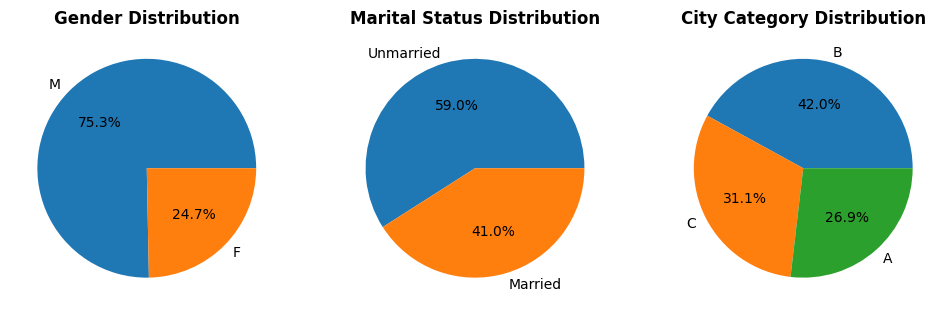

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.pie(data['Gender'].value_counts(),labels=data['Gender'].value_counts().index,autopct='%1.1f%%')
plt.title('Gender Distribution',fontweight='bold')
plt.subplot(1,3,2)
plt.pie(data['Marital_Status'].value_counts(),labels=data['Marital_Status'].value_counts().index,autopct='%1.1f%%')
plt.title('Marital Status Distribution',fontweight='bold')
plt.subplot(1,3,3)
plt.pie(data['City_Category'].value_counts(),labels=data['City_Category'].value_counts().index,autopct='%1.1f%%')
plt.title('City Category Distribution',fontweight='bold')
plt.show()

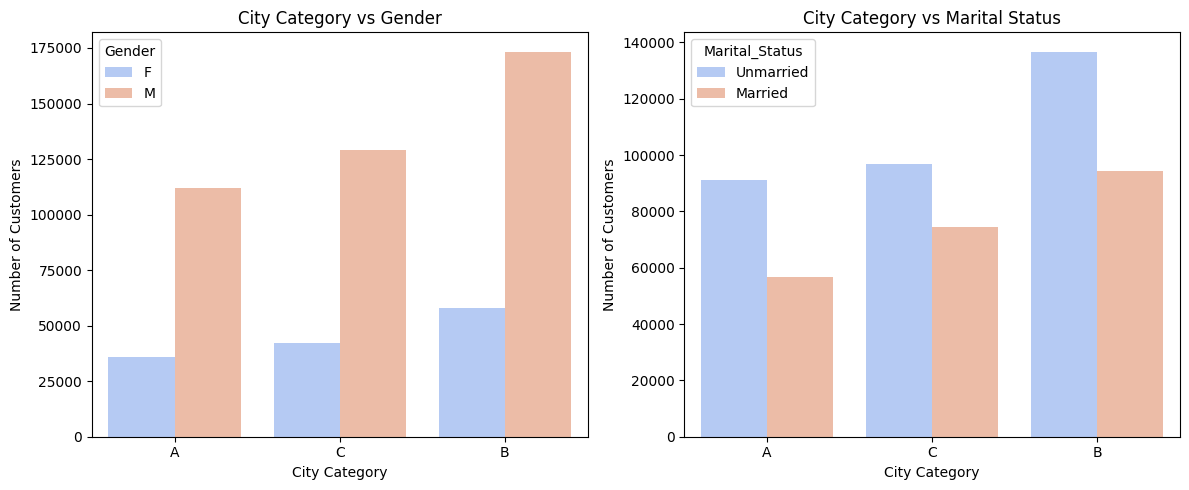

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data=data,x='City_Category',hue='Gender',palette='coolwarm')
plt.xlabel('City Category')
plt.ylabel('Number of Customers')
plt.title('City Category vs Gender')
plt.subplot(1,2,2)
sns.countplot(data=data,x='City_Category',hue='Marital_Status',palette='coolwarm')
plt.xlabel('City Category')
plt.ylabel('Number of Customers')
plt.title('City Category vs Marital Status')
plt.tight_layout()
plt.show()

Observations:

1.  **Gender Distribution:** The pie chart shows that the dataset has a significantly higher proportion of male customers compared to female customers.
2.  **Marital Status Distribution:** The pie chart indicates that the dataset has more unmarried customers than married customers.
3.  **City Category Distribution:** The pie chart shows that City Category B has the highest number of customers, followed by City Category C and then City Category A.
4.  **City Category vs. Gender:** The count plot reveals that in all city categories, there are more male customers than female customers, consistent with the overall gender distribution.
5.  **City Category vs. Marital Status:** The count plot shows that in all city categories, there are more unmarried customers than married customers, consistent with the overall marital status distribution. The distribution of married and unmarried customers appears similar across the city categories.

## Age-Group Distribution

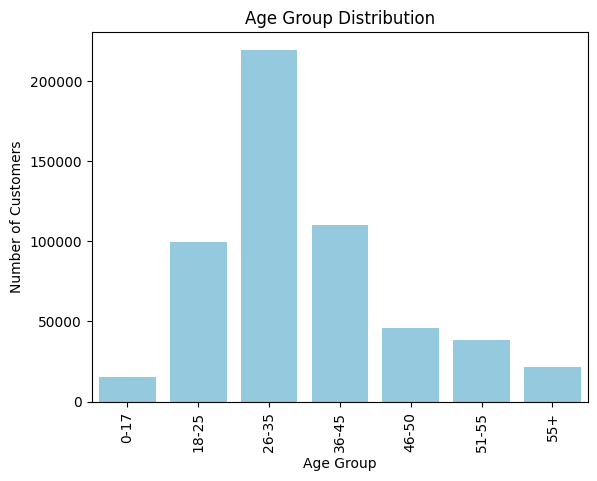

In [ ]:
sns.countplot(data=data, x='Age', color='skyblue', order=np.sort(data['Age'].unique()))
plt.xticks(rotation=90)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Age Group Distribution')
plt.show()

In [ ]:
pd.crosstab(index=data['Age'],columns='count',normalize=True)*100

col_0,count
Age,
0-17,2.745479
18-25,18.117760
26-35,39.919974
36-45,19.999891
46-50,8.308246
51-55,6.999316
55+,3.909335


Observations:

The age group 26-35 are the most frequent customers during Black Friday salefollowed by 36-45 and 18-25.

## Customer Stay In City Distribution

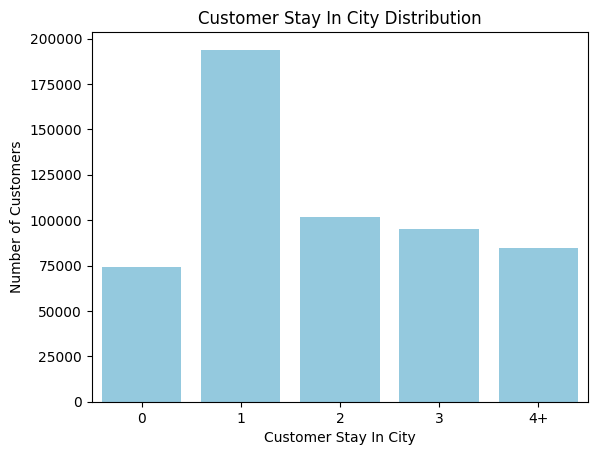

In [ ]:
sns.countplot(data=data,x='Stay_In_Current_City_Years',color='skyblue', order=np.sort(data['Stay_In_Current_City_Years'].unique()))
plt.xlabel('Customer Stay In City')
plt.ylabel('Number of Customers')
plt.title('Customer Stay In City Distribution')
plt.show()

In [ ]:
pd.crosstab(index=data['Stay_In_Current_City_Years'],columns='count',normalize=True)*100

col_0,count
Stay_In_Current_City_Years,
0,13.525237
1,35.235825
2,18.513711
3,17.322404
4+,15.402823


Observations:

1. The people who have spent 1 year in the city dominate in spending during the Black Friday sale compared to people who have recently moved to the city.

2. Also the customers spend less as their stay in the city increases.


## Product Category Distribution

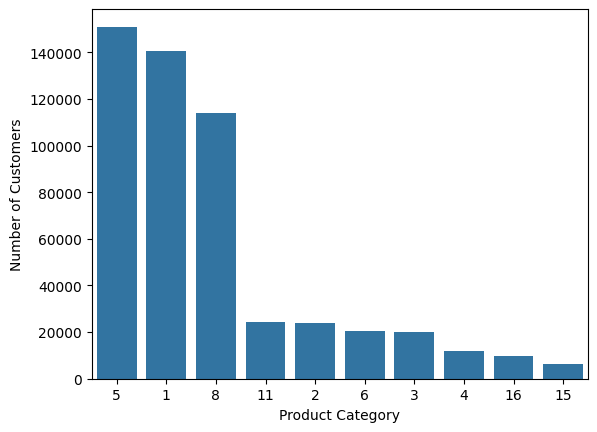

In [ ]:
top_10_product_category=data['Product_Category'].value_counts().head(10)
sns.barplot(x=top_10_product_category.index,y=top_10_product_category.values,order=top_10_product_category.index)
plt.xlabel('Product Category')
plt.ylabel('Number of Customers')
plt.show()

Observations:

The product ID 5 has the highest number of customers followed by 1 and 8.

## Product ID Distribution

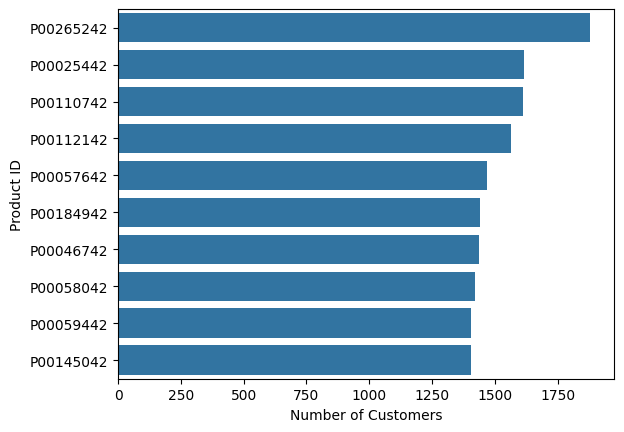

In [ ]:
top_10_product_ID=data['Product_ID'].value_counts().head(10)
sns.barplot(y=top_10_product_ID.index, x=top_10_product_ID.values, order=top_10_product_ID.index)
plt.ylabel('Product ID')
plt.xlabel('Number of Customers')
plt.show()

Observations:

Product ID 'P00265242' is the most frequently purchased product, followed by 'P00025442' and 'P00110742'.

## Occupation Distribution

/tmp/ipython-input-1000418582.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Occupation',order=occupation_order, palette='coolwarm')


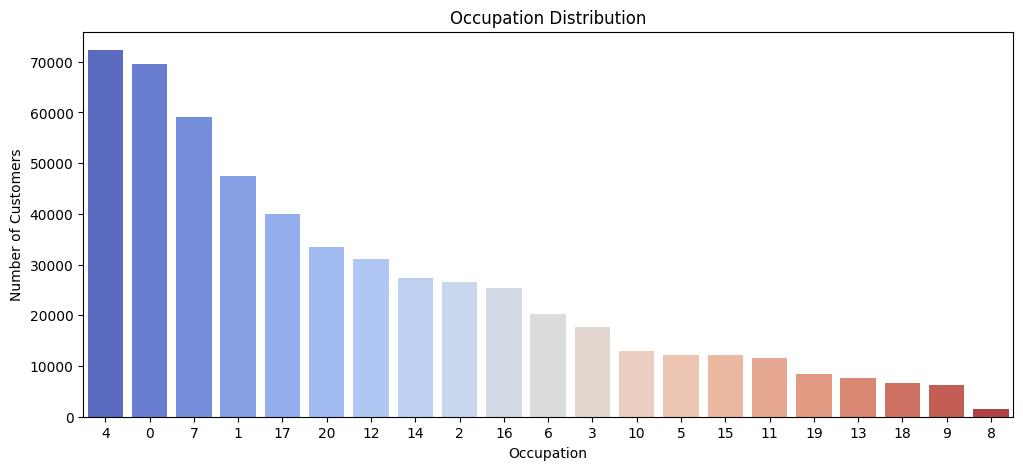

In [ ]:
plt.figure(figsize=(12,5))
occupation_order = data['Occupation'].value_counts().index
sns.countplot(data=data, x='Occupation',order=occupation_order, palette='coolwarm')
plt.xlabel('Occupation')
plt.ylabel('Number of Customers')
plt.title('Occupation Distribution')
plt.show()

Observations:

Customers with Occupation 4 purcahse more frequently folllowed by customers having occupation 0 and 7.

## Box Plot for various categories based on Purchase Amount

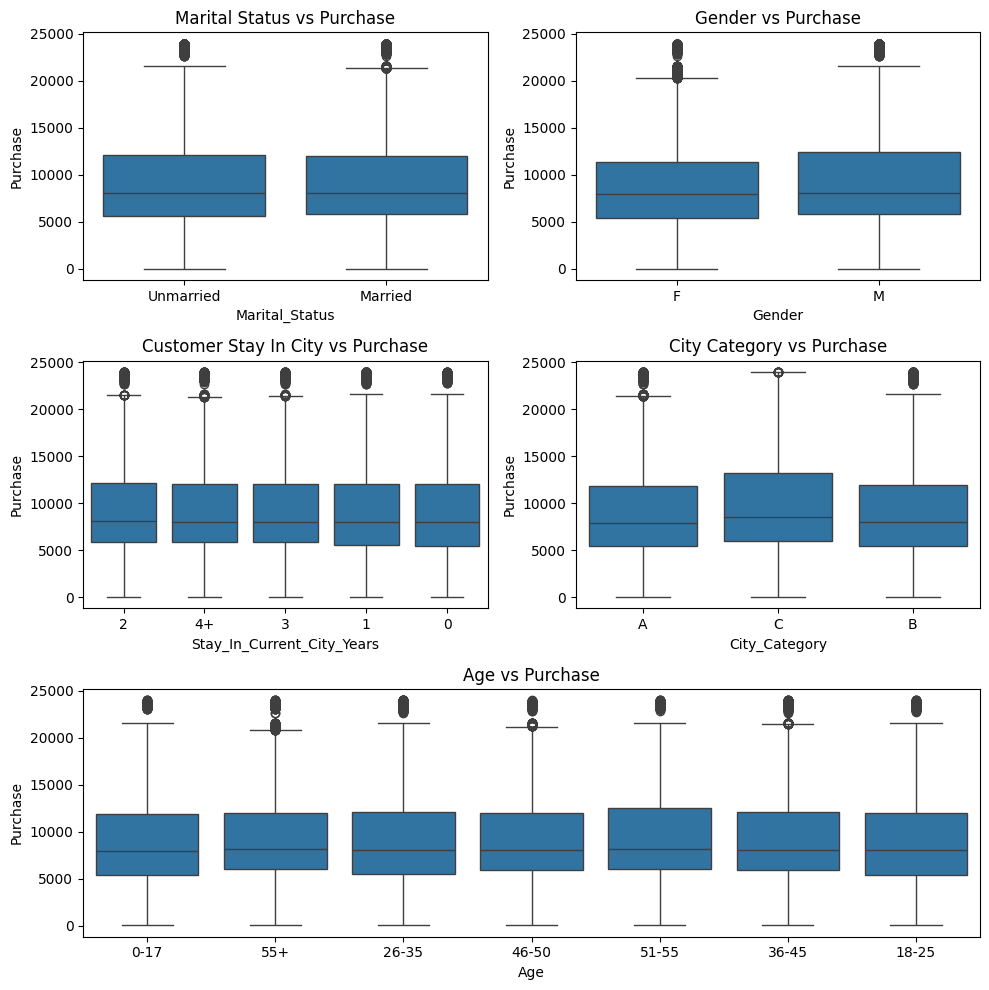

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.boxplot(y=data['Purchase'],x=data['Marital_Status'])
plt.title('Marital Status vs Purchase')
plt.subplot(3,2,2)
sns.boxplot(y=data['Purchase'],x=data['Gender'])
plt.title('Gender vs Purchase')
plt.subplot(3,2,3)
sns.boxplot(y=data['Purchase'],x=data['Stay_In_Current_City_Years'])
plt.title('Customer Stay In City vs Purchase')
plt.subplot(3,2,4)
sns.boxplot(y=data['Purchase'],x=data['City_Category'])
plt.title('City Category vs Purchase')
plt.subplot(3,1,3)
sns.boxplot(y=data['Purchase'],x=data['Age'])
plt.title('Age vs Purchase')
plt.tight_layout()
plt.show()


Observations:

1.  **Marital Status vs. Purchase:** The boxplots for Marital Status show very similar distributions of purchase amounts for both married and unmarried individuals, suggesting that marital status does not have a significant impact on the range or central tendency of purchase amounts.
2.  **Gender vs. Purchase:** The boxplots for Gender indicate that both male and female customers have similar ranges and distributions of purchase amounts, although there might be slight differences in the median or quartiles.
3.  **Customer Stay In City vs. Purchase:** The boxplots for Stay In Current City Years show that the distribution of purchase amounts is relatively similar across different years of stay in the city, with similar medians and ranges.
4.  **City Category vs. Purchase:** The boxplots for City Category suggest that the distribution of purchase amounts is somewhat similar across categories A, B, and C, although there might be subtle differences in the spread or median.
5.  **Age vs. Purchase:** The boxplots for Age groups show that the distribution of purchase amounts is broadly similar across most age groups, with comparable medians and ranges. However, some age groups might exhibit slightly different spreads or the presence of more outliers.
6.  Across all categories, there are outliers with high purchase amounts, as indicated by the individual points beyond the whiskers of the boxplots.

## Gender V/S Purchase Distribution

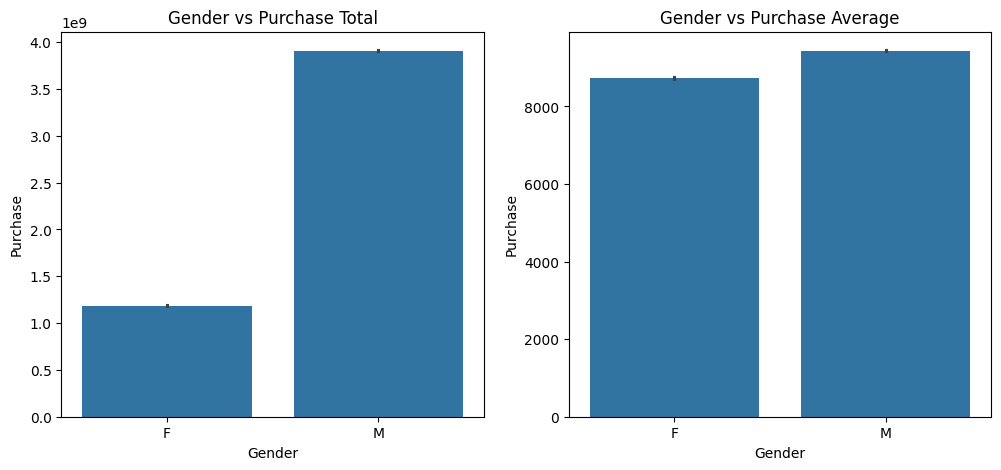

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(y=data['Purchase'],x=data['Gender'],estimator='sum')
plt.title('Gender vs Purchase Total')
plt.subplot(1,2,2)
sns.barplot(y=data['Purchase'],x=data['Gender'],estimator='mean')
plt.title('Gender vs Purchase Average')
plt.show()


Observations:

1.  **Total Purchase:** The plot shows that the total purchase amount for males is significantly higher than for females.
2.  **Average Purchase:** The plot of average purchase amount by gender also indicates that, on average, males spend slightly more per transaction than females.
3.  These observations suggest that while there might be more male customers or males might make more frequent purchases, the average spending per purchase is also higher for males. This aligns with the business problem's question about whether women spend more than men on Black Friday (and the data suggests the opposite in terms of both total and average purchase).

## Age V/S Purchase Distribution

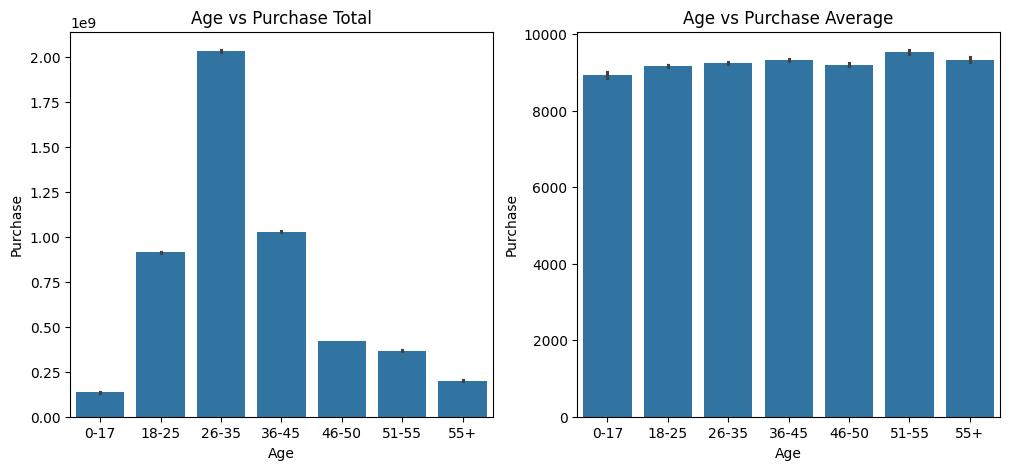

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(y=data['Purchase'],x=data['Age'],estimator='sum',order=np.sort(data['Age'].unique()))
plt.title('Age vs Purchase Total')
plt.subplot(1,2,2)
sns.barplot(y=data['Purchase'],x=data['Age'],estimator='mean',order=np.sort(data['Age'].unique()))
plt.title('Age vs Purchase Average')
plt.show()

Observations:

1.  **Total Purchase:** The age group '26-35' has the highest total purchase amount, followed by '36-45' and '18-25'. The '0-17' and '55+' age groups have the lowest total purchase amounts.
2.  **Average Purchase:** While the total purchase varies significantly by age group, the average purchase amount per transaction is relatively similar across most age groups, ranging from approximately \$8500 to \$9500.
3.  The higher total purchase amounts for age groups like '26-35' are likely due to a larger number of customers in these groups, as seen in the age distribution plot, rather than a significantly higher average spending per transaction.

# Confidence Interval

In [ ]:
#creating a function to calculate confidence interval

def confidence_interval(data,ci):
    #converting the list to series
    l_ci = (100-ci)/2
    u_ci = (100+ci)/2

    #calculating lower limit and upper limit of confidence interval
    interval = np.percentile(data,[l_ci,u_ci]).round(0)

    return interval

### Confidence Interval Construction of per expense transaction basis of Gender

In [ ]:
results=[]

In [ ]:
def plot(ci):
  male=data[data['Gender']=='M']['Purchase']
  female=data[data['Gender']=='F']['Purchase']

  sample_sizes = [(100,1),(1000,2),(10000,3),(100000,4)]
  male_samples=[]
  female_samples=[]

  total_samples=20000
  plt.figure(figsize=(12,5))
  for i,p1 in sample_sizes:
    male_means=[]
    female_means=[]

    for j in range(total_samples):
      male_bootstrapped_samples = np.random.choice(male,size = i)
      female_bootstrapped_samples = np.random.choice(female,size = i)

      male_sample_mean=np.mean(male_bootstrapped_samples)
      female_sample_mean=np.mean(female_bootstrapped_samples)

      male_means.append(male_sample_mean)
      female_means.append(female_sample_mean)

    plt.subplot(2,2,p1)
    sns.kdeplot(male_means,label='Male',color='red',fill=True)
    sns.kdeplot(female_means,label='Female',color='green',fill=True)

    m_range=confidence_interval(male_means,ci)
    f_range=confidence_interval(female_means,ci)

    for k in m_range:
      plt.axvline(x=k,color='red',linestyle='--')
    for k in f_range:
      plt.axvline(x=k,color='green',linestyle='--')
    plt.xlabel('Purchase Mean', fontsize=10)
    plt.ylabel('Density', fontsize=10)
    plt.title(f'Sample Size = {i}', fontsize=12)
    plt.legend()

    results.append({
        'gender': 'Male',
            'sample_size': i,
            'confidence_interval': ci,
            'range': m_range,
            'ci_width':m_range[1]-m_range[0]
    })

    results.append({
        'gender': 'Female',
            'sample_size': i,
            'confidence_interval': ci,
            'range': f_range,
            'ci_width':f_range[1]-f_range[0]

    })

  plt.suptitle(f"{ci}% Confidence Interval", fontsize=16,fontweight='bold')
  plt.tight_layout()
  plt.show()



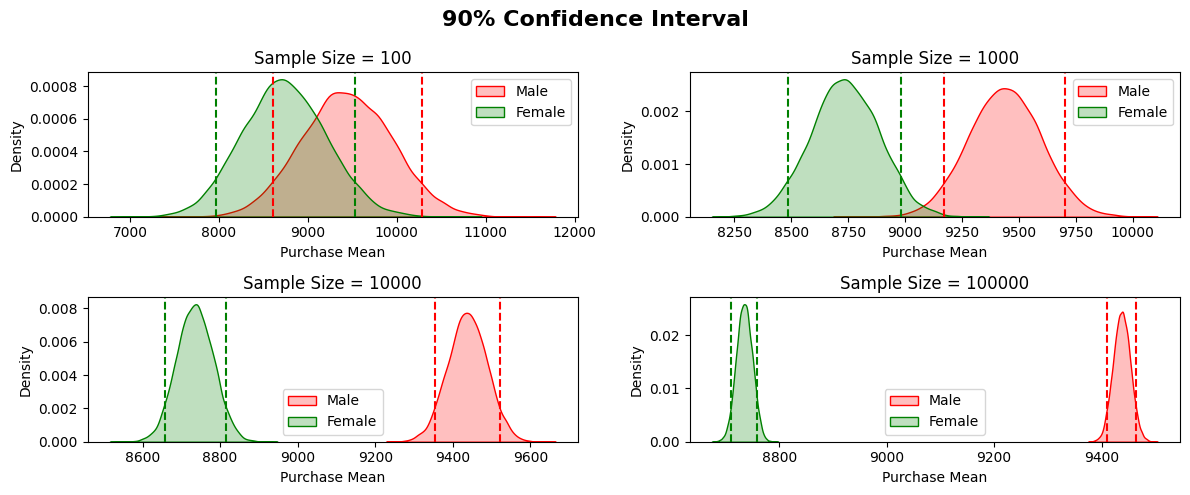

In [ ]:
plot(90)

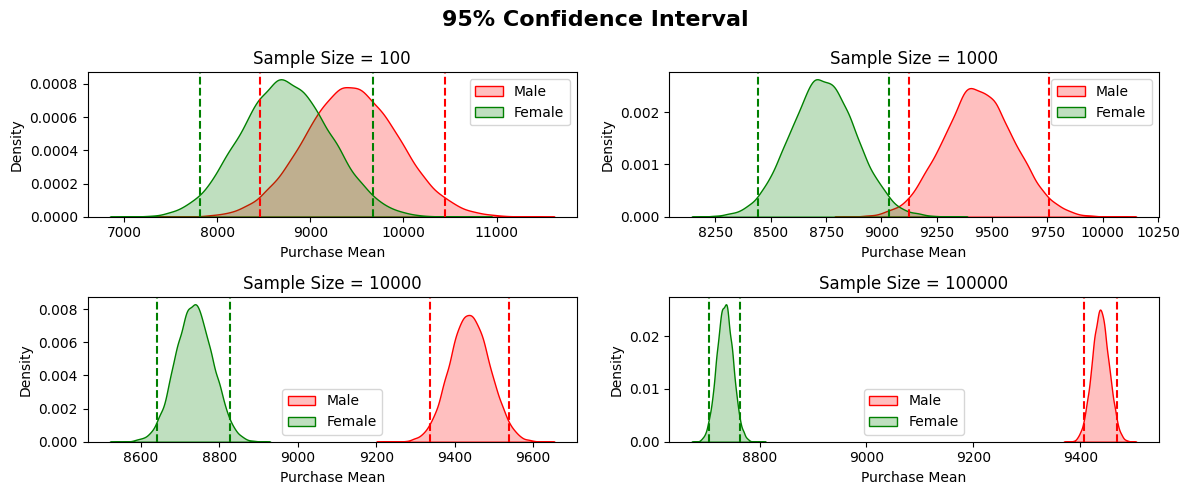

In [ ]:
plot(95)

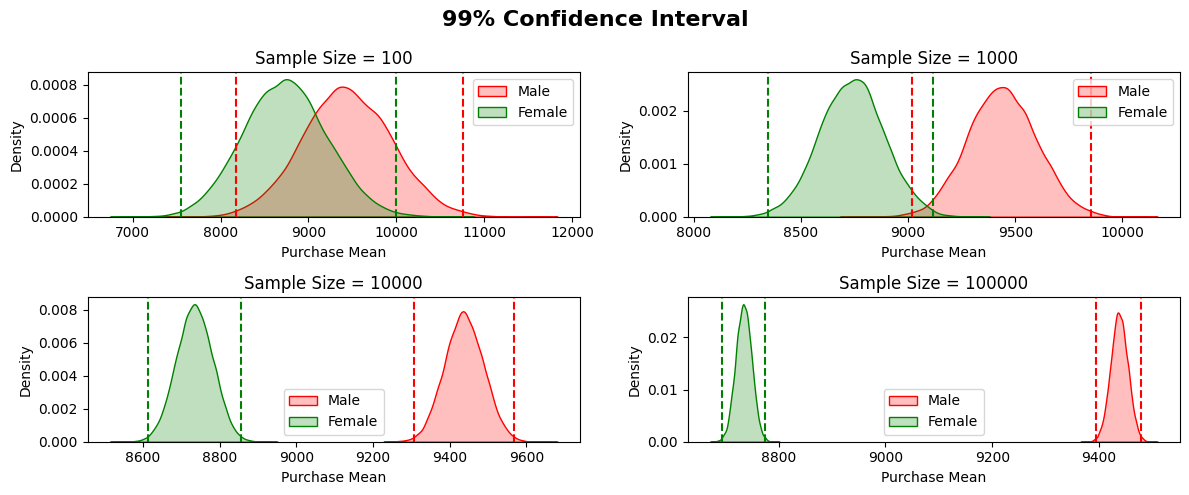

In [ ]:
plot(99)

In [ ]:
confidence_interval_gender=pd.DataFrame(results)
display(confidence_interval_gender)

,gender,sample_size,confidence_interval,range,ci_width
0,Male,100,90,"[8607.0, 10282.0]",1675.0
1,Female,100,90,"[7964.0, 9532.0]",1568.0
2,Male,1000,90,"[9173.0, 9703.0]",530.0
3,Female,1000,90,"[8485.0, 8983.0]",498.0
4,Male,10000,90,"[9354.0, 9521.0]",167.0
5,Female,10000,90,"[8657.0, 8814.0]",157.0
6,Male,100000,90,"[9411.0, 9464.0]",53.0
7,Female,100000,90,"[8710.0, 8759.0]",49.0
8,Male,100,95,"[8463.0, 10445.0]",1982.0
9,Female,100,95,"[7813.0, 9675.0]",1862.0


Observations:

1. As the sample size increases the confidence interval becomes more narrow and precise.
2. As the sample size increases the the confidence interval of transaction done by male and female do not overlap.
3. We are 95% confident purcahse amount for male falls between \$9406 to \$9469 while for females \$8705 to \$8764.
4. Men mostly spend more money on purchase then women.


### Confidence Interval Construction of per expense transaction basis of Marital Status

In [ ]:
results_marital=[]

In [ ]:
def plot_2(ci):
  married=data[data['Marital_Status']=='Married']['Purchase']
  unmarried=data[data['Marital_Status']=='Unmarried']['Purchase']

  sample_sizes = [(100,1),(1000,2),(10000,3),(100000,4)]
  married_samples=[]
  unmarried_samples=[]

  total_samples=20000
  plt.figure(figsize=(12,5))
  for i,p1 in sample_sizes:
    married_means=[]
    unmarried_means=[]
    for j in range(total_samples):
      married_bootstrapped_samples = np.random.choice(married,size = i)
      unmarried_bootstrapped_samples = np.random.choice(unmarried,size = i)

      married_sample_mean=np.mean(married_bootstrapped_samples)
      unmarried_sample_mean=np.mean(unmarried_bootstrapped_samples)

      married_means.append(married_sample_mean)
      unmarried_means.append(unmarried_sample_mean)

    plt.subplot(2,2,p1)
    sns.kdeplot(married_means,label='Married',color='red',fill=True)
    sns.kdeplot(unmarried_means,label='Unmarried',color='green',fill=True)
    m_range=confidence_interval(married_means,ci)
    u_range=confidence_interval(unmarried_means,ci)
    for k in m_range:
      plt.axvline(x=k,color='red',linestyle='--')
    for k in u_range:
      plt.axvline(x=k,color='green',linestyle='--')

    plt.xlabel('Purchase Mean', fontsize=10)
    plt.ylabel('Density', fontsize=10)
    plt.title(f'Sample Size = {i}', fontsize=12)
    plt.legend()

    results_marital.append({
        'marital_status': 'Married',
            'sample_size': i,
            'confidence_interval': ci,
            'range': m_range,
            'ci_width':m_range[1]-m_range[0]
    })
    results_marital.append({
        'marital_status': 'Unmarried',
            'sample_size': i,
            'confidence_interval': ci,
            'range': u_range,
            'ci_width':u_range[1]-u_range[0]

    })

  plt.suptitle(f"{ci}% Confidence Interval", fontsize=16,fontweight='bold')
  plt.tight_layout()
  plt.show()

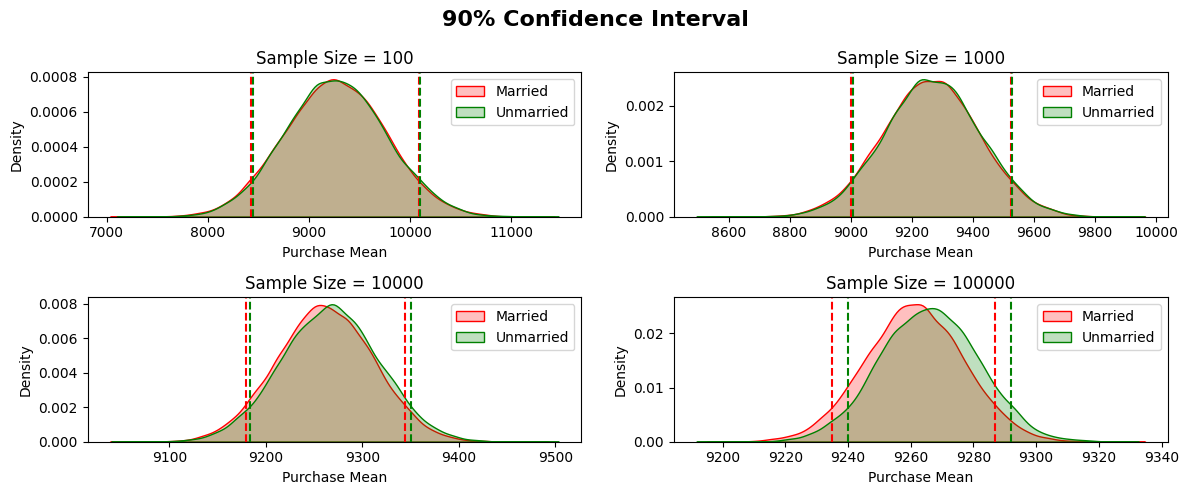

In [ ]:
plot_2(90)

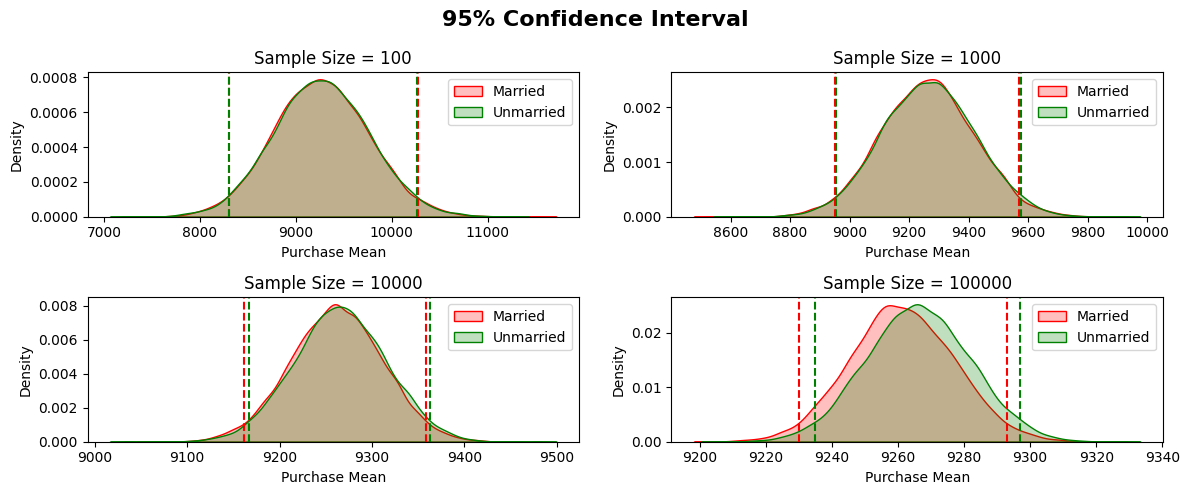

In [ ]:
plot_2(95)

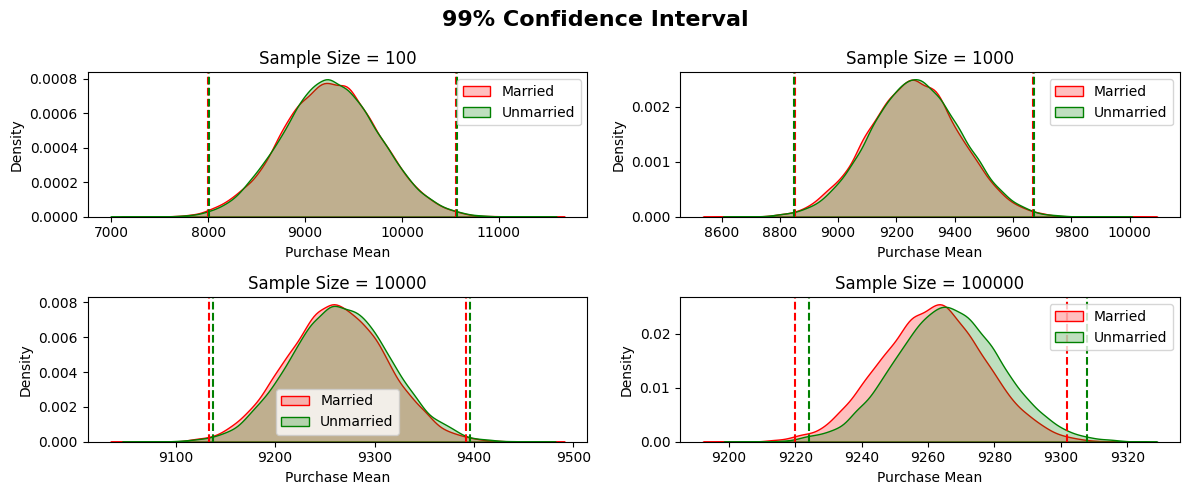

In [ ]:
plot_2(99)

In [ ]:
confidence_interval_marital=pd.DataFrame(results_marital)
display(confidence_interval_marital)

,marital_status,sample_size,confidence_interval,range,ci_width
0,Married,100,90,"[8428.0, 10089.0]",1661.0
1,Unmarried,100,90,"[8450.0, 10100.0]",1650.0
2,Married,1000,90,"[8999.0, 9526.0]",527.0
3,Unmarried,1000,90,"[9006.0, 9529.0]",523.0
4,Married,10000,90,"[9179.0, 9344.0]",165.0
5,Unmarried,10000,90,"[9183.0, 9350.0]",167.0
6,Married,100000,90,"[9235.0, 9287.0]",52.0
7,Unmarried,100000,90,"[9240.0, 9292.0]",52.0
8,Married,100,95,"[8298.0, 10269.0]",1971.0
9,Unmarried,100,95,"[8302.0, 10261.0]",1959.0


Observations:

1. As the sample size increases, the confidence interval for both married and unmarried groups becomes narrower, indicating increased precision in estimating the mean purchase amount.
2. The confidence intervals for married and unmarried individuals largely overlap, especially at smaller sample sizes. As the sample size increases, the intervals remain close and still overlap.
3. The mean purchase amounts for married and unmarried customers are very similar across all sample sizes and confidence levels. This suggests that marital status does not have a significant impact on the average purchase amount during Black Friday.
4. We are 95% confident that for unmarried customers that purcahse amount falls \$ 9235 to \$ 9298 while for married falls between \$ 9231 to \$9292

### Confidence Interval Construction per expense transaction on basis of age

In [ ]:
results_age=[]
age_ranges=['0-17','18-25','26-35','36-45','46-50','51-55','55+']

In [ ]:
def plot_3(ci):
  age_ranges_data = {age: data[data['Age'] == age]['Purchase'] for age in age_ranges}

  sample_sizes = [(100, 1), (1000, 2), (10000, 3), (100000, 4)]
  total_samples = 2000
  age_samples = {age: [] for age in age_ranges}  # Store CI bounds

  colors = ['red', 'green', 'blue', 'purple', 'orange', 'cyan', 'magenta']
  plt.figure(figsize=(12,12))
  for i, p1 in sample_sizes:
          age_means = {age: [] for age in age_ranges}


          for age, age_data in age_ranges_data.items():
              for j in range(total_samples):
                  bootstrapped_samples = np.random.choice(age_data, size=i)
                  sample_mean = np.mean(bootstrapped_samples)
                  age_means[age].append(sample_mean)




          plt.subplot(4,1, p1)
          for idx, age in enumerate(age_ranges):
              sns.kdeplot(age_means[age], label=age,color=colors[idx % len(colors)])
              plt.legend()
          for idx, age in enumerate(age_ranges):
            range_get=confidence_interval(age_means[age],ci)

            for k in range_get:
              plt.axvline(x=k,linestyle='--',color=colors[idx % len(colors)])
            plt.xlabel('Purchase Mean', fontsize=10)
            plt.ylabel('Density', fontsize=10)
            plt.title(f'Sample Size = {i}', fontsize=12)
            results_age.append({
                'age': age,
                'sample_size': i,
                'confidence_interval': ci,
                'range': range_get,
                'ci_width':range_get[1]-range_get[0]
            })

  plt.suptitle(f"{ci}% Confidence Interval", fontsize=16,fontweight='bold')
  plt.tight_layout()
  plt.show()




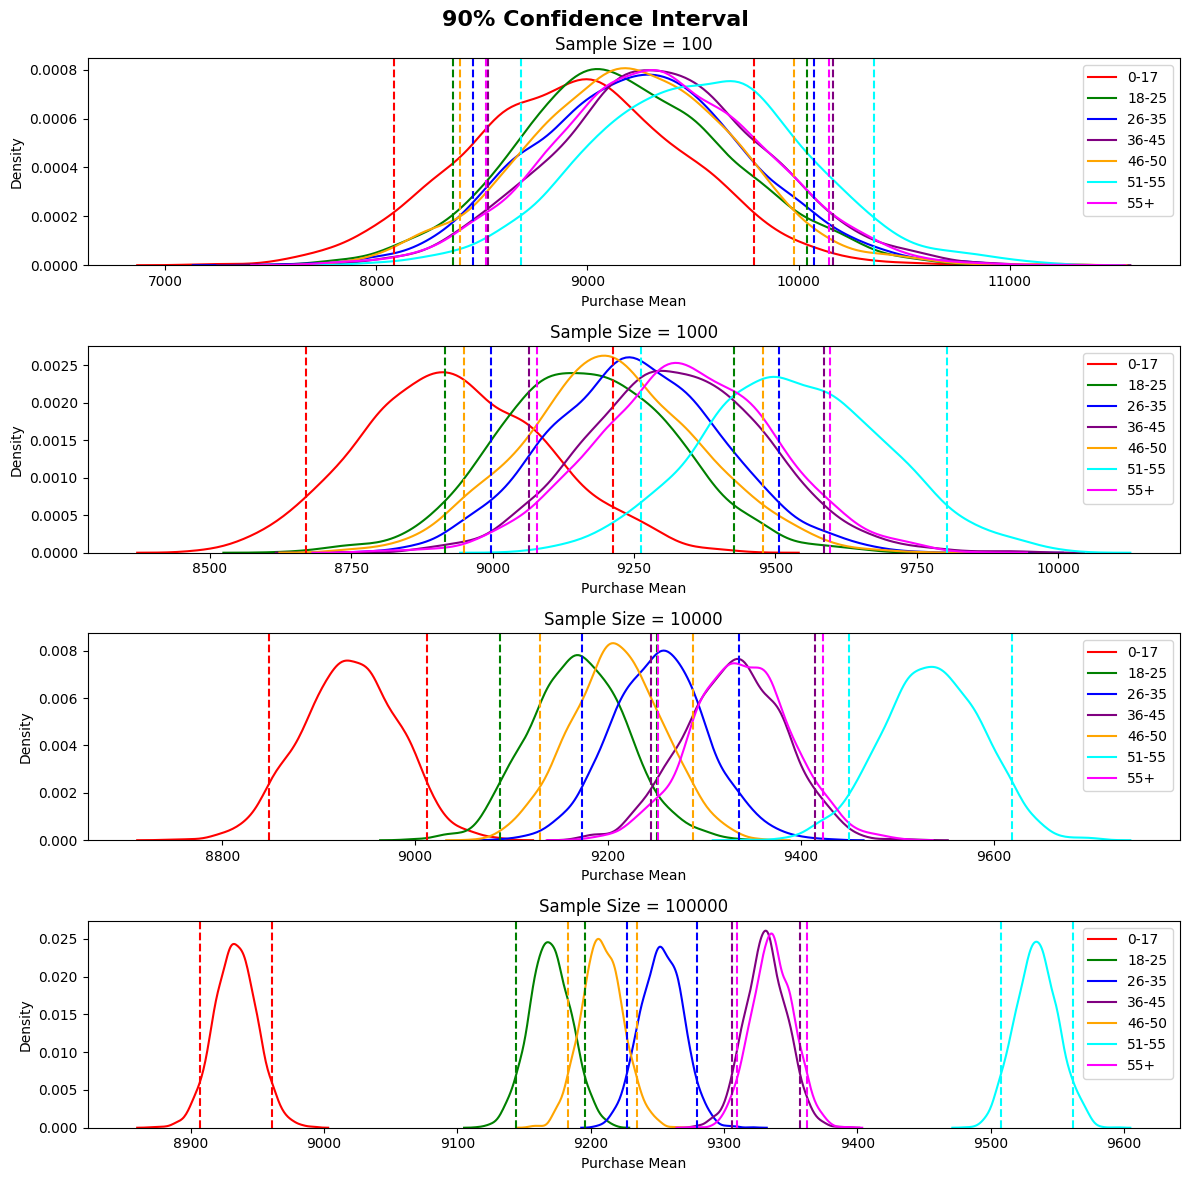

In [ ]:
plot_3(90)

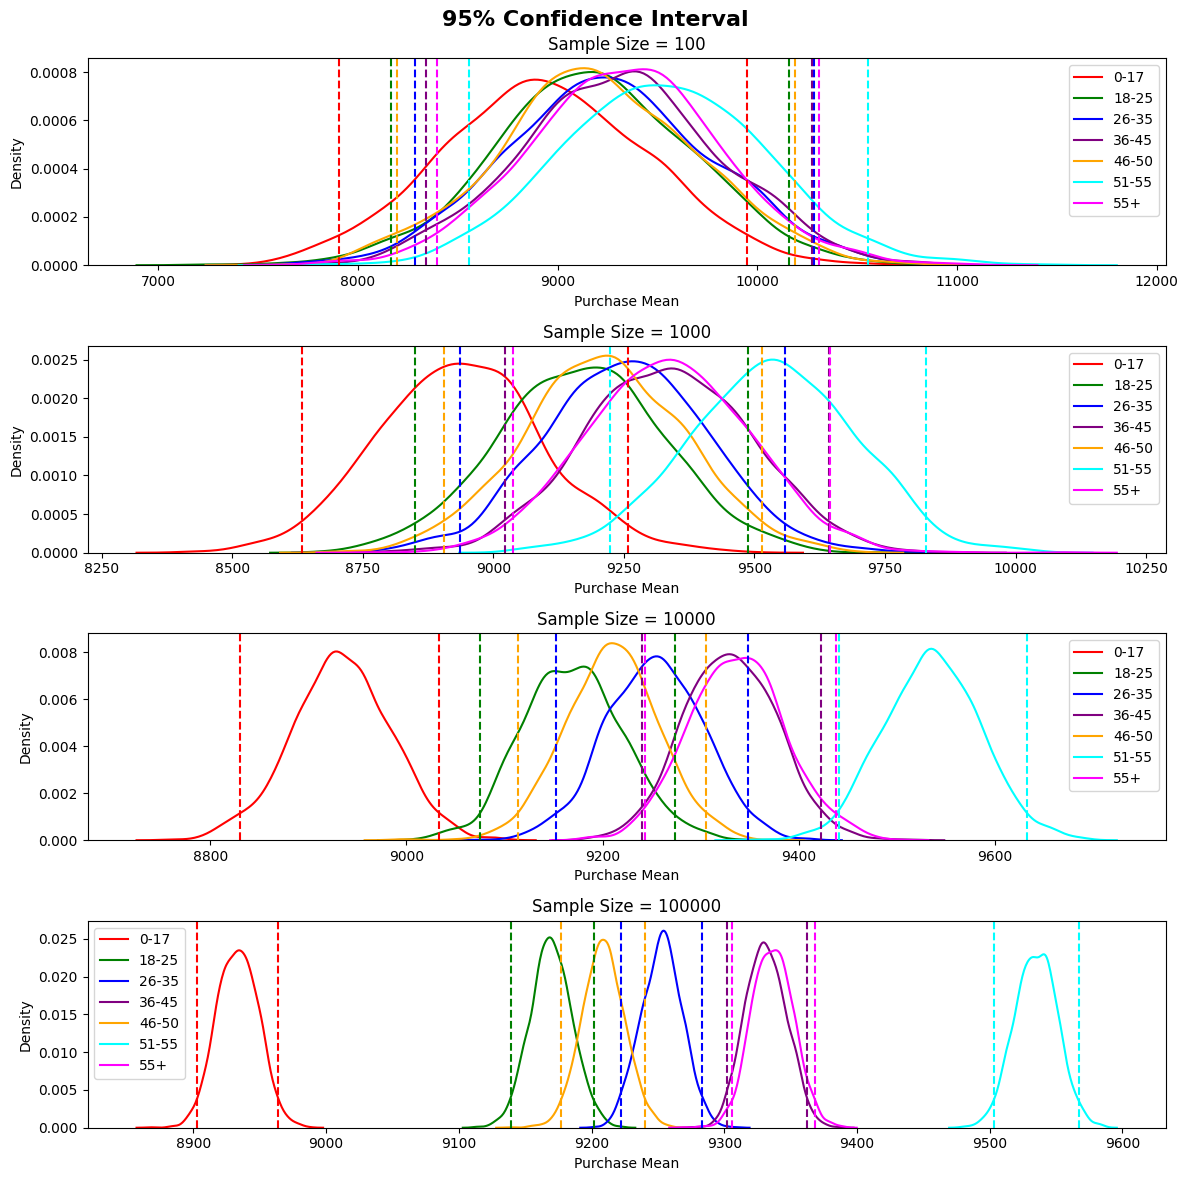

In [ ]:
plot_3(95)

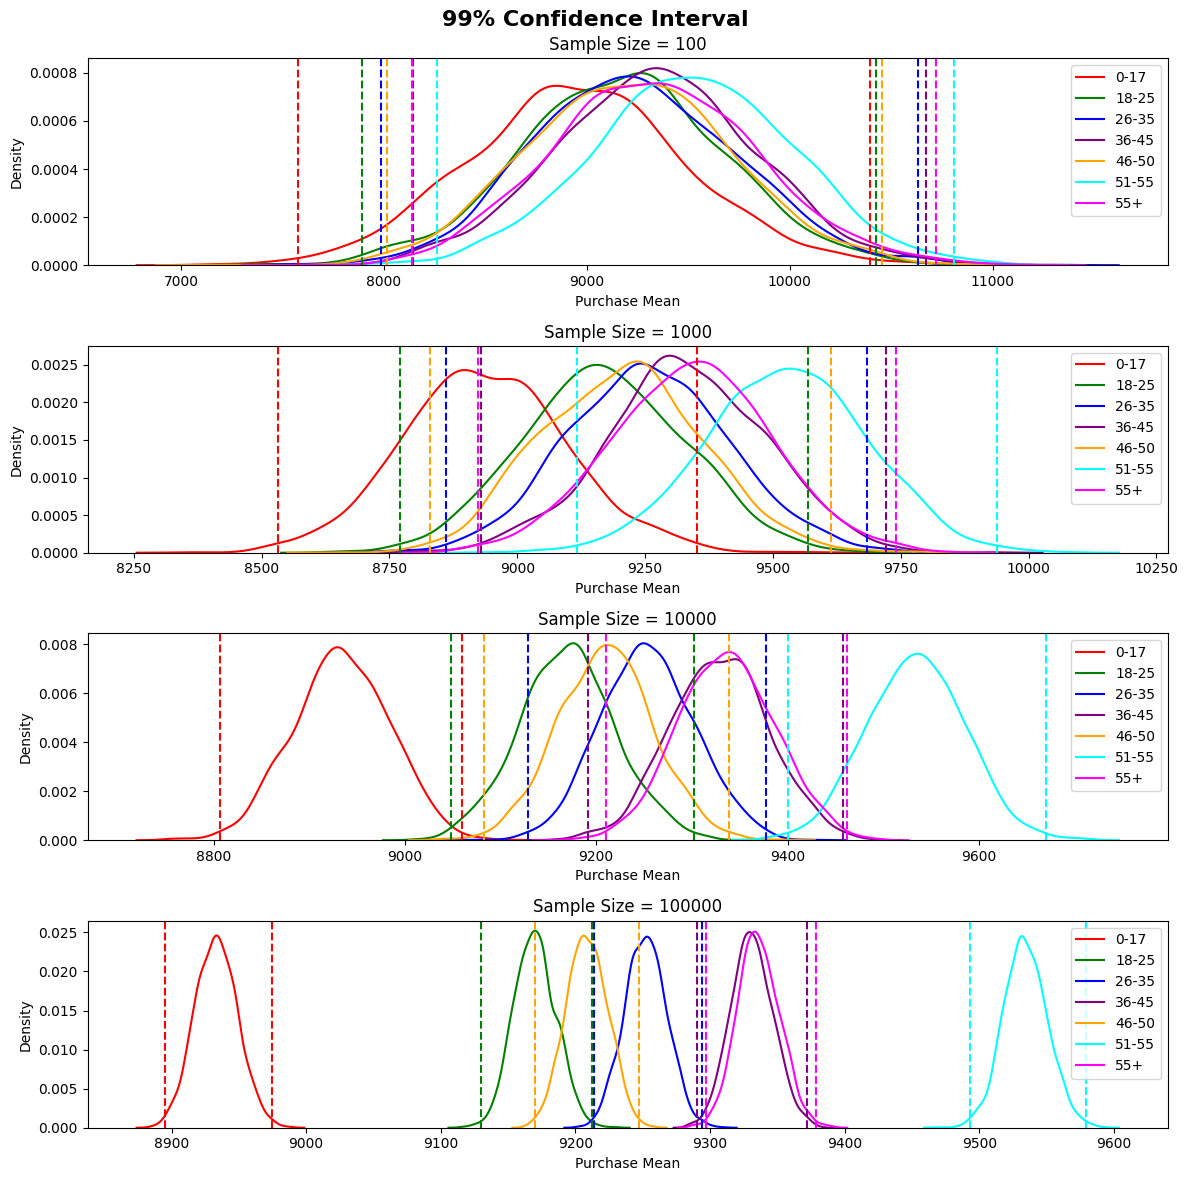

In [ ]:
plot_3(99)

In [ ]:
confidence_interval_age=pd.DataFrame(results_age)
display(confidence_interval_age)

,age,sample_size,confidence_interval,range,ci_width
0,0-17,100,90,"[8082.0, 9788.0]",1706.0
1,18-25,100,90,"[8364.0, 10040.0]",1676.0
2,26-35,100,90,"[8457.0, 10071.0]",1614.0
3,36-45,100,90,"[8528.0, 10161.0]",1633.0
4,46-50,100,90,"[8399.0, 9977.0]",1578.0
...,...,...,...,...,...
79,26-35,100000,99,"[9214.0, 9294.0]",80.0
80,36-45,100000,99,"[9290.0, 9372.0]",82.0
81,46-50,100000,99,"[9170.0, 9247.0]",77.0
82,51-55,100000,99,"[9493.0, 9579.0]",86.0


Observations:

1. As the sample size increases, the confidence interval for all age groups becomes narrower, indicating increased precision in estimating the mean purchase amount.
2. The confidence intervals for some of the groups overlap while some don't. The age group 0-17 appears to have the lowest spending transaction mean.
3. The age group 46-50 partially overlap with age groups 18-25 and 26-35.
4. The age group 36-45 and 55+ overlap each other while the age group 51-55 has the highest spending transaction mean.


# Recommendations

1. Target Male Customers. Walmart can target male customers more during Black Friday sales since they tend to spend more like giving discounts for more amount of purchase.

2. Walmart can ensure competitive pricing for female oriented products.

3. Focus 18-45 age groups as frequent customers are from this age group only.

4. Since age group 0-17 spend very much they can be offered discounts.